In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm, skew, probplot
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

NAmes      326
CollgCr    188
OldTown    166
Sawyer     115
Gilbert    112
Edwards    112
Somerst    111
NWAmes      99
NridgHt     95
BrkSide     85
SawyerW     85
Mitchel     84
Crawfor     69
NoRidge     46
IDOTRR      43
Timber      42
StoneBr     38
SWISU       32
MeadowV     30
ClearCr     27
BrDale      21
Blmngtn     18
NPkVill     18
Veenker     15
Greens       7
Name: Neighborhood, dtype: int64
Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal', 'MoSold',
       'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr', 'gcode',
       'lat', 'long', 'dist', 'zip', 'tract', 'income', 'hood_Blmngtn',


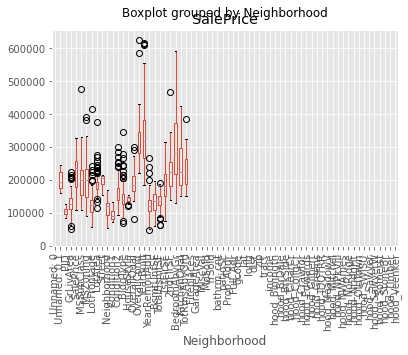

In [2]:
from clean_data import *

In [3]:
rf = RandomForestRegressor(bootstrap = True, n_estimators = 1000, oob_score=True)

params = {"min_samples_leaf": 4,
    "min_samples_split": 4}
rf.set_params = params


In [4]:
rf.fit(X1,Y)

RandomForestRegressor(n_estimators=1000, oob_score=True)

In [5]:
rf.score(X1,Y)

0.9596786404577008

In [6]:
predict = rf.predict(X1)
error = (predict - Y)**2
np.sqrt(np.mean(error))

2.9651291211351283

In [7]:
RMSE = np.sqrt(mean_squared_error(Y,predict))
RMSE

2.965129121135125

In [8]:
feature_list = list(X1.columns) # Saving feature names for later use
# Get numerical feature importances
importances = list(rf.feature_importances_)

## List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

## Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

## Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: OverallQual          Importance: 0.25476
Variable: TotalBsmtSF          Importance: 0.14204
Variable: YearRemodAdd         Importance: 0.11957
Variable: Bsmt_ratio           Importance: 0.07497
Variable: OverallCond          Importance: 0.05511
Variable: GarageArea           Importance: 0.04846
Variable: bsmt_above_ratio     Importance: 0.04344
Variable: LotArea              Importance: 0.03304
Variable: dist                 Importance: 0.02854
Variable: patioSF              Importance: 0.02242
Variable: bathrm_cnt           Importance: 0.02056
Variable: LotFrontage          Importance: 0.02038
Variable: BldgType_Duplex      Importance: 0.01945
Variable: Bedr_ratio           Importance: 0.01802
Variable: income               Importance: 0.01612
Variable: KitchenQual          Importance: 0.01601
Variable: MSZoning_RM          Importance: 0.01105
Variable: hood_OldTown         Importance: 0.00628
Variable: MSZoning_RL          Importance: 0.00478
Variable: HouseStyle_2Story    

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [9]:
rf.oob_score_

0.7033037909141675

In [3]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
rf = RandomForestRegressor(bootstrap = True, oob_score=True)
params = {'max_depth': [14, 16, 17, 18, 19],
          'max_features': [5, 6, 7],
          'min_samples_leaf': [1, 2, 3],
          'min_samples_split': [2, 3,],
          'n_estimators': [100, 150, 125, 90, 80, 110]
         }
rf3 = RandomizedSearchCV(rf, params, n_iter=500, 
                         cv=3, verbose=2, 
                         random_state=42, n_jobs=-1
                        )

rf3.fit(X1,Y)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(oob_score=True),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'max_depth': [14, 16, 17, 18, 19],
                                        'max_features': [5, 6, 7],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [100, 150, 125, 90, 80,
                                                         110]},
                   random_state=42, verbose=2)

In [79]:
# rf3 third run
print(rf3.best_params_)
print('rf3 R2:', rf3.best_estimator_.score(X1,Y))
print('rf3 Oob:', rf3.best_estimator_.oob_score_)
print('rf3 R2 Test:', rf3.best_estimator_.score(X1_test, Y_test))
# rf2 third run
print(rf2.best_params_)
print('rf2 R2:', rf2.best_estimator_.score(X1,Y))
print('rf2 Oob:', rf2.best_estimator_.oob_score_)
print('rf3 R2 Test:', rf2.best_estimator_.score(X1_test, Y_test))
# rfr second run
print(rfr.best_params_)
print('rfr R2:', rfr.best_estimator_.score(X1,Y))
print('rfr Oob:', rfr.best_estimator_.oob_score_)
print('rf3 R2 Test:', rfr.best_estimator_.score(X1_test, Y_test))
# grid_rf first run
print(grid_rf.best_params_)
print('grid_rf R2:', grid_rf.best_estimator_.score(X1,Y))
print('grid_rf Oob:', grid_rf.best_estimator_.oob_score_)
print('rf3 R2 Test:', grid_rf_rf.best_estimator_.score(X1_test, Y_test))

{'n_estimators': 90, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 7, 'max_depth': 18}
rf3 R2: 0.9351531973927483
rf3 Oob: 0.6793179520345957
rf3 R2 Test: 0.6554452819497816
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 18}
rf2 R2: 0.9390689006811765
rf2 Oob: 0.6633062842166508
rf3 R2 Test: 0.6358214541089378
{'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 20}
rfr R2: 0.7299441540462821
rfr Oob: 0.5957304067274125
rf3 R2 Test: 0.556625382735146
{'min_samples_leaf': 3, 'min_samples_split': 6}
grid_rf R2: 0.9126970709561424
grid_rf Oob: 0.694438721961357


NameError: name 'grid_rf_rf' is not defined

In [4]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [5]:
RF = RandomForestRegressor(bootstrap = True, oob_score=True)
RF1 = RandomizedSearchCV(RF, random_grid, n_iter=50, 
                         cv=3, verbose=2, 
                         random_state=42, n_jobs=-1
                        )

RF1.fit(X1,Y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.667657   0.63599913        nan        nan 0.61756768        nan
        nan        nan        nan        nan 0.67727613        nan
        nan        nan        nan        nan        nan 0.67225601
        nan 0.68628412        nan        nan 0.63408194 0.68495791
        nan        nan        nan 0.65762755        nan 0.66036323
        nan        nan        nan 0.63239614 0.63433576        nan
 0.65701368 0.68514885 0.68562353 0.66034326 0.67061436 0.64945424
 0.63492842 0.63160668        nan 0.67291506 0.68469819        nan
        nan        nan]
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(oob_score=True),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

NAmes      74
CollgCr    48
Edwards    42
OldTown    37
Gilbert    31
Somerst    28
SawyerW    27
NWAmes     24
Sawyer     23
Mitchel    19
NoRidge    19
Crawfor    19
BrkSide    18
NridgHt    15
IDOTRR     12
Timber     10
SWISU       9
Veenker     8
BrDale      8
ClearCr     6
Blmngtn     5
StoneBr     5
NPkVill     4
MeadowV     4
Greens      1
Name: Neighborhood, dtype: int64
Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal', 'MoSold',
       'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr', 'gcode',
       'lat', 'long', 'dist', 'zip', 'tract', 'income', 'hood_Blmngtn',
       'hood_BrDale', 'ho

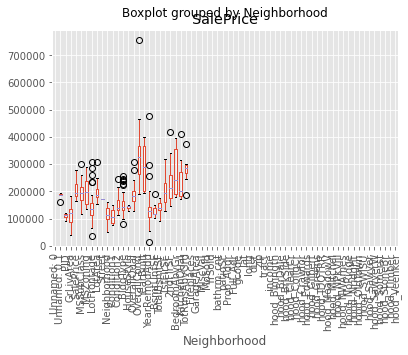

In [6]:
from clean_data_test import *

In [76]:
mape

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
                ..
hood_StoneBr   NaN
hood_Timber    NaN
hood_Veenker   NaN
income         NaN
patioSF        NaN
Length: 548, dtype: float64

In [11]:
Y_test.shape

(493,)

In [13]:
predict.shape

(493,)

In [15]:
print(X1.shape)
X1_test.shape

(1978, 55)


(493, 55)

In [19]:
# RF1 random generated params
print(RF1.best_params_)
print('RF1 R2:', RF1.best_estimator_.score(X1,Y))
print('RF1 Oob:', RF1.best_estimator_.oob_score_)
print('RF1 R2 Test:', RF1.best_estimator_.score(X1_test, Y_test))

predict = (RF1.predict(X1_test))*test['TotalSF']
mse = mean_squared_error(predict, (Y_test*test['TotalSF']))
RMSE = np.sqrt(mse)
print(RMSE)
RF1.best_estimator_.score(X1_test*test['TotalSF'],test['SalePrice'])

{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}
RF1 R2: 0.945550067526093
RF1 Oob: 0.6995010256459877
RF1 R2 Test: 0.6812217986204305
20790.4934764797


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [8]:
print('RF1 R2 Test:', RF1.best_estimator_.score((test['TotalSF']*X1_test), test['SalePrice']))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [53]:
Results = pd.DataFrame(rfr.cv_results_)
Results.sort_values(by='rank_test_score', ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
253,0.462056,0.010779,0.026306,0.002021,100,4,3,3,20,"{'n_estimators': 100, 'min_samples_split': 4, ...",0.548481,0.595267,0.624432,0.570473,0.589370,0.585605,0.025386,1
496,2.202839,0.017752,0.111196,0.004533,500,4,3,3,100,"{'n_estimators': 500, 'min_samples_split': 4, ...",0.544008,0.589917,0.623237,0.576468,0.593330,0.585392,0.025722,2
254,2.193366,0.040024,0.111614,0.005081,500,6,3,3,100,"{'n_estimators': 500, 'min_samples_split': 6, ...",0.545545,0.596385,0.619607,0.579218,0.585405,0.585232,0.024155,3
24,4.279942,0.103948,0.197911,0.003288,1000,6,3,3,100,"{'n_estimators': 1000, 'min_samples_split': 6,...",0.542666,0.597733,0.625231,0.570648,0.588705,0.584997,0.027541,4
395,0.451660,0.009608,0.026411,0.000275,100,6,3,3,20,"{'n_estimators': 100, 'min_samples_split': 6, ...",0.546459,0.599539,0.622035,0.568550,0.588006,0.584918,0.025876,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,3.701845,0.070468,0.184214,0.004694,1000,20,5,2,10,"{'n_estimators': 1000, 'min_samples_split': 20...",0.431531,0.468213,0.505973,0.445724,0.465206,0.463329,0.025167,496
200,2.214813,0.057725,0.123369,0.024796,500,2,5,2,10,"{'n_estimators': 500, 'min_samples_split': 2, ...",0.425802,0.466139,0.511334,0.444928,0.465907,0.462822,0.028512,497
169,2.097390,0.053373,0.105862,0.004441,500,20,5,2,10,"{'n_estimators': 500, 'min_samples_split': 20,...",0.434659,0.459405,0.506790,0.447770,0.463983,0.462522,0.024354,498
115,0.413106,0.014988,0.025845,0.004034,100,20,5,2,10,"{'n_estimators': 100, 'min_samples_split': 20,...",0.419610,0.469206,0.500832,0.443128,0.462409,0.459037,0.027089,499


In [27]:
rfr.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 3,
 'max_depth': 20}

In [28]:
grid_rf.best_estimator_.score(X1,Y)

0.9126970709561424

In [29]:
grid_rf.best_estimator_.oob_score_

0.694438721961357

In [32]:
for iter in range(50):
    rf.fit(X1, Y)
    y_train_predicted = rfr.best_estimator_.predict(X1)
    #y_test_predicted = rf.predict(X_test)
    mse_train = mean_squared_error(Y, y_train_predicted)
    #mse_test = mean_squared_error(y_test, y_test_predicted)
    print("Iteration: {} Train mse: {}".format(iter, mse_train))
    rf.n_estimators += 1

Iteration: 0 Train mse: 58.8851297279837
Iteration: 1 Train mse: 58.8851297279837
Iteration: 2 Train mse: 58.8851297279837
Iteration: 3 Train mse: 58.8851297279837
Iteration: 4 Train mse: 58.8851297279837
Iteration: 5 Train mse: 58.8851297279837
Iteration: 6 Train mse: 58.8851297279837
Iteration: 7 Train mse: 58.8851297279837
Iteration: 8 Train mse: 58.8851297279837
Iteration: 9 Train mse: 58.8851297279837
Iteration: 10 Train mse: 58.8851297279837
Iteration: 11 Train mse: 58.8851297279837
Iteration: 12 Train mse: 58.8851297279837
Iteration: 13 Train mse: 58.8851297279837
Iteration: 14 Train mse: 58.8851297279837
Iteration: 15 Train mse: 58.8851297279837
Iteration: 16 Train mse: 58.8851297279837
Iteration: 17 Train mse: 58.8851297279837
Iteration: 18 Train mse: 58.8851297279837
Iteration: 19 Train mse: 58.8851297279837
Iteration: 20 Train mse: 58.8851297279837
Iteration: 21 Train mse: 58.8851297279837
Iteration: 22 Train mse: 58.8851297279837
Iteration: 23 Train mse: 58.8851297279837
It

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(random_state = 42)
# from pprint import pprint
# # Look at parameters used by our current forest
# print('Parameters currently in use:\n')
# pprint(rf.get_params())
# Parameters currently in use:

# {'bootstrap': True,
#  'criterion': 'mse',
#  'max_depth': None,
#  'max_features': 'auto',
#  'max_leaf_nodes': None,
#  'min_impurity_decrease': 0.0,
#  'min_impurity_split': None,
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'min_weight_fraction_leaf': 0.0,
#  'n_estimators': 10,
#  'n_jobs': 1,
#  'oob_score': False,
#  'random_state': 42,
#  'verbose': 0,
#  'warm_start': False}